## Data Preprocessing Steps:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Global_YouTube_Statistics.csv', encoding='latin1')

In [ ]:
# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())

# Display summary statistics
print(df.describe())


   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           IN  ...                   

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with mean or median, or drop rows/columns)
df['subscribers'] = df['subscribers'].fillna(df['subscribers'].median())
df = df.dropna(subset=['video views'])


rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

In [ ]:
import pandas as pd


# Check initial missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing numerical values with median
numerical_cols_with_missing = ['subscribers', 'video_views_rank', 'country_rank', 'channel_type_rank',
                               'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']
for col in numerical_cols_with_missing:
    df[col] = df[col].fillna(df[col].median())

# Handle missing categorical values with mode
categorical_cols_with_missing = ['category', 'Country of origin', 'Country', 'Abbreviation', 'channel_type']
for col in categorical_cols_with_missing:
    df[col] = df[col].fillna(df[col].mode()[0])

# Handle missing date values with backfill method
date_cols_with_missing = ['created_year', 'created_month', 'created_date']
for col in date_cols_with_missing:
    df[col] = df[col].fillna(method='bfill')

# Handle other specific columns with placeholders or dropping
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].fillna(df['Gross tertiary education enrollment (%)'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())
df['Unemployment rate'] = df['Unemployment rate'].fillna(df['Unemployment rate'].median())
df['Urban_population'] = df['Urban_population'].fillna(df['Urban_population'].median())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())

# Final inspection
print(df.isnull().sum())
print(df.head())



rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

In [ ]:
import pandas as pd


null_counts = df.isnull().sum()

print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [ ]:
# Check for duplicates
print(df.duplicated().sum())

df = df.drop_duplicates()


11


In [ ]:
#Checking the datatypes of columns
data_types = df.dtypes

print("Datatypes of columns:")
print(data_types)


Datatypes of columns:
rank                                         int64
Youtuber                                    object
subscribers                                float64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country of origin                           object
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribe

In [ ]:
# Convert numerical columns to appropriate types
df['subscribers'] = df['subscribers'].astype(int)
df['video views'] = df['video views'].astype(int)
df['uploads'] = df['uploads'].astype(int)

# Convert created_year and created_date columns to datetime
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['created_year'] = df['created_date'].dt.year
df['created_month'] = df['created_date'].dt.month

# Verify the conversions
print(df.dtypes)


rank                                                int64
Youtuber                                           object
subscribers                                         int64
video views                                         int64
category                                           object
Title                                              object
uploads                                             int64
Country of origin                                  object
Country                                            object
Abbreviation                                       object
channel_type                                       object
video_views_rank                                  float64
country_rank                                      float64
channel_type_rank                                 float64
video_views_for_the_last_30_days                  float64
lowest_monthly_earnings                           float64
highest_monthly_earnings                          float64
lowest_yearly_

In [ ]:
# Extract additional date features if needed
df['created_day'] = df['created_date'].dt.day


In [ ]:
# Normalize text data
df['Youtuber'] = df['Youtuber'].str.lower().str.replace('[^a-zA-Z0-9 ]', '')
df['category'] = df['category'].str.lower().str.replace('[^a-zA-Z0-9 ]', '')


In [ ]:
#Using IQR to identify outliers in yearly earnings
Q1 = df['highest_yearly_earnings'].quantile(0.25)
Q3 = df['highest_yearly_earnings'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['highest_yearly_earnings'] < (Q1 - 1.5 * IQR)) | (df['highest_yearly_earnings'] > (Q3 + 1.5 * IQR)))]


In [ ]:
# Example using MinMaxScaler for scaling
scaler = MinMaxScaler()
df[['subscribers', 'video views', 'highest_yearly_earnings']] = scaler.fit_transform(df[['subscribers', 'video views', 'highest_yearly_earnings']])


In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['category', 'channel_type'])


# 1. Top 10 YouTube Channels by Subscribers

In [ ]:
top_10_channels = df.sort_values(by='subscribers', ascending=False).head(10)
print(top_10_channels[['Youtuber', 'subscribers']])


           Youtuber  subscribers
1    youtube movies     0.677697
5             music     0.458530
7         pewdiepie     0.424151
8       like nastya     0.402664
12           gaming     0.349377
14        goldmines     0.320584
16  5-minute crafts     0.291362
17        bangtantv     0.272024
18           sports     0.269446
19    justin bieber     0.254835


#2. Category with Highest Average Number of Subscribers

In [ ]:

# Melt the DataFrame to combine categories into a single column
category_columns = [col for col in df.columns if col.startswith('category_')]
df_melted = df.melt(id_vars=['Youtuber', 'subscribers'], value_vars=category_columns,
                    var_name='category', value_name='category_value')

# Filter rows where category_value is 1 (assuming 1 indicates the category of the Youtuber)
df_filtered = df_melted[df_melted['category_value'] == 1]

# Remove 'category_value' column as it's no longer needed
df_filtered.drop(columns=['category_value'], inplace=True)

# Remove the 'category_' prefix from the category names
df_filtered['category'] = df_filtered['category'].str.replace('category_', '')

# Calculate the average subscribers for each category
category_avg_subscribers = df_filtered.groupby('category')['subscribers'].mean()

# Identify the category with the highest average number of subscribers
highest_avg_subscribers_category = category_avg_subscribers.idxmax()

print("Category with Highest Average Number of Subscribers:", highest_avg_subscribers_category)
print(category_avg_subscribers)


Category with Highest Average Number of Subscribers: trailers
category
autos & vehicles         0.023850
comedy                   0.033926
education                0.033713
entertainment            0.036073
film & animation         0.064626
gaming                   0.037527
howto & style            0.030138
movies                   0.057370
music                    0.047483
news & politics          0.027835
nonprofits & activism    0.066394
people & blogs           0.032649
pets & animals           0.016903
science & technology     0.027149
shows                    0.029759
sports                   0.039482
trailers                 0.114740
travel & events          0.000859
Name: subscribers, dtype: float64


<ipython-input-16-afbe3a8b93b8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['category_value'], inplace=True)
<ipython-input-16-afbe3a8b93b8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df_filtered['category'].str.replace('category_', '')


# 3.Average Videos Uploaded by Category

In [ ]:
# Melt the DataFrame to combine categories into a single column
category_columns = [col for col in df.columns if col.startswith('category_')]
df_melted = df.melt(id_vars=['Youtuber', 'uploads'], value_vars=category_columns,
                    var_name='category', value_name='category_value')

# Filter rows where category_value is 1 (assuming 1 indicates the category of the Youtuber)
df_filtered = df_melted[df_melted['category_value'] == 1]

# Remove 'category_value' column as it's no longer needed
df_filtered.drop(columns=['category_value'], inplace=True)

# Remove the 'category_' prefix from the category names
df_filtered['category'] = df_filtered['category'].str.replace('category_', '')

# Calculate the average number of uploads for each category
avg_uploads_per_category = df_filtered.groupby('category')['uploads'].mean()

print("Average Videos Uploaded by Category:")
print(avg_uploads_per_category)

Average Videos Uploaded by Category:
category
autos & vehicles           1898.500000
comedy                     1044.000000
education                  3391.100000
entertainment              8436.061538
film & animation           2975.897436
gaming                     4353.695652
howto & style              1731.210526
movies                     3553.000000
music                      2138.306878
news & politics           93925.681818
nonprofits & activism    102912.000000
people & blogs             6848.232759
pets & animals             5679.000000
science & technology       2114.058824
shows                      3842.500000
sports                    10931.750000
trailers                   6839.000000
travel & events             766.000000
Name: uploads, dtype: float64


<ipython-input-17-46a3e0c8e0ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['category_value'], inplace=True)
<ipython-input-17-46a3e0c8e0ca>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df_filtered['category'].str.replace('category_', '')


# 4. Top 5 Countries with Highest Number of YouTube Channels

In [ ]:
top_5_countries = df['Country'].value_counts().head(5)
print(top_5_countries)


Country
United States     401
India             140
Brazil             58
United Kingdom     42
Mexico             32
Name: count, dtype: int64


# 5. Distribution of Channel Types Across Categories

In [ ]:
# Melt the DataFrame to combine categories into a single column
category_columns = [col for col in df.columns if col.startswith('category_')]
df_melted = df.melt(id_vars=['Youtuber', 'uploads'], value_vars=category_columns,
                    var_name='category', value_name='category_value')

# Filter rows where category_value is 1 (assuming 1 indicates the category of the Youtuber)
df_filtered = df_melted[df_melted['category_value'] == 1]

# Remove 'category_value' column as it's no longer needed
df_filtered.drop(columns=['category_value'], inplace=True)

# Remove the 'category_' prefix from the category names
df_filtered['category'] = df_filtered['category'].str.replace('category_', '')

# Calculate the average number of uploads for each category
avg_uploads_per_category = df_filtered.groupby('category')['uploads'].mean()

print("Average Videos Uploaded by Category:")
print(avg_uploads_per_category)

Average Videos Uploaded by Category:
category
autos & vehicles           1898.500000
comedy                     1044.000000
education                  3391.100000
entertainment              8436.061538
film & animation           2975.897436
gaming                     4353.695652
howto & style              1731.210526
movies                     3553.000000
music                      2138.306878
news & politics           93925.681818
nonprofits & activism    102912.000000
people & blogs             6848.232759
pets & animals             5679.000000
science & technology       2114.058824
shows                      3842.500000
sports                    10931.750000
trailers                   6839.000000
travel & events             766.000000
Name: uploads, dtype: float64


<ipython-input-19-46a3e0c8e0ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['category_value'], inplace=True)
<ipython-input-19-46a3e0c8e0ca>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df_filtered['category'].str.replace('category_', '')


# 6. Correlation Between Subscribers and Video Views

In [ ]:
correlation = df['subscribers'].corr(df['video views'])
print(correlation)


0.5254066649757096


# 7. Monthly Earnings Across Categories

In [ ]:
# Melt the DataFrame to combine categories into a single column
category_columns = [col for col in df.columns if col.startswith('category_')]
df_melted = df.melt(id_vars=['Youtuber', 'lowest_monthly_earnings', 'highest_monthly_earnings'],
                    value_vars=category_columns, var_name='category', value_name='category_value')

# Filter rows where category_value is 1 (assuming 1 indicates the category of the Youtuber)
df_filtered = df_melted[df_melted['category_value'] == 1]

# Remove 'category_value' column as it's no longer needed
df_filtered.drop(columns=['category_value'], inplace=True)

# Remove the 'category_' prefix from the category names
df_filtered['category'] = df_filtered['category'].str.replace('category_', '')

# Calculate the average monthly earnings for each category
monthly_earnings_by_category = df_filtered.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()

print("Average Monthly Earnings by Category:")
print(monthly_earnings_by_category)

Average Monthly Earnings by Category:
                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
autos & vehicles                  68300.000000              1.086350e+06
comedy                            12226.545455              1.947917e+05
education                         22257.725250              3.570750e+05
entertainment                     18401.763654              2.944017e+05
film & animation                  18092.666923              2.898534e+05
gaming                            13192.935652              2.115121e+05
howto & style                      9063.000526              1.449806e+05
movies                            28400.000000              4.547000e+05
music                             24557.430741              3.918758e+05
news & politics                   28323.102273              4.549287e+05
nonprofits & activism             24400.000000              3.904000e+05
people & blog

<ipython-input-21-5229ebcb5a85>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['category_value'], inplace=True)
<ipython-input-21-5229ebcb5a85>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df_filtered['category'].str.replace('category_', '')


# 8. Trend in Subscribers Gained in Last 30 Days

In [ ]:
trend_subscribers_30_days = df['subscribers_for_last_30_days'].sum()
print(trend_subscribers_30_days)


185964069.0


# 9. Outliers in Yearly Earnings

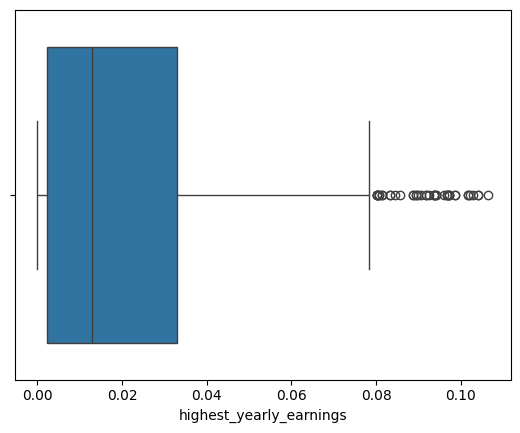

In [ ]:
sns.boxplot(x=df['highest_yearly_earnings'])
plt.show()


# 10. Distribution of Channel Creation Dates

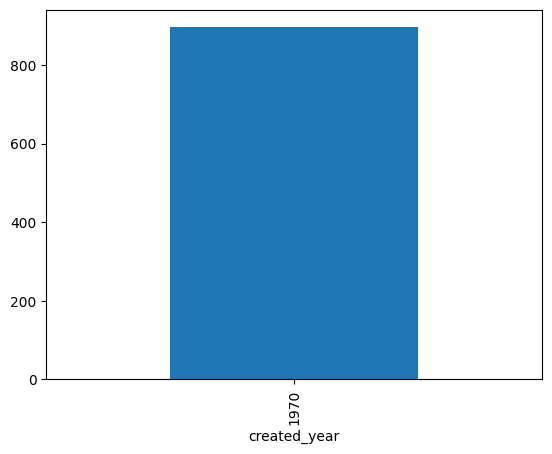

In [ ]:
df['created_year'].value_counts().sort_index().plot(kind='bar')
plt.show()


# 11. Relationship Between Education Enrollment and Number of Channels

In [ ]:
education_channels_correlation = df.groupby('Country')['Gross tertiary education enrollment (%)'].mean().corr(df['Country'].value_counts())
print(education_channels_correlation)


0.11111032311356961


# 12. Unemployment Rate in Top 10 Countries

In [ ]:
top_10_countries = df['Country'].value_counts().head(10).index
unemployment_top_10 = df[df['Country'].isin(top_10_countries)].groupby('Country')['Unemployment rate'].mean()
print(unemployment_top_10)


Country
Brazil            12.080000
Canada             5.560000
India              5.360000
Indonesia          4.690000
Mexico             3.420000
South Korea        4.150000
Spain             13.960000
Thailand           0.750000
United Kingdom     3.850000
United States     13.045436
Name: Unemployment rate, dtype: float64


# 13. Average Urban Population Percentage

In [ ]:
avg_urban_population = df['Urban_population'].mean()
print(avg_urban_population)


227368694.7935268


# 14. Distribution Based on Latitude and Longitude

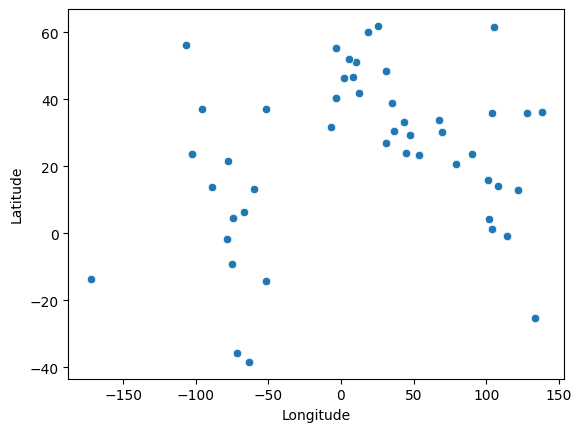

In [ ]:
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.show()


# 15. Correlation Between Subscribers and Population

In [ ]:
subscribers_population_correlation = df['subscribers'].corr(df['Population'])
print(subscribers_population_correlation)


-0.011183939548061673


# 16. Comparison of Top 10 Countries by Population

In [ ]:
top_10_population = df[df['Country'].isin(top_10_countries)].groupby('Country')['Population'].mean()
print(top_10_population)


Country
Brazil            2.125594e+08
Canada            3.699198e+07
India             1.366418e+09
Indonesia         2.702039e+08
Mexico            1.260140e+08
South Korea       5.170910e+07
Spain             4.707678e+07
Thailand          6.962558e+07
United Kingdom    6.683440e+07
United States     3.282395e+08
Name: Population, dtype: float64


# 17. Correlation Between Subscribers Gained and Unemployment Rate

In [ ]:
subscribers_unemployment_correlation = df['subscribers_for_last_30_days'].corr(df['Unemployment rate'])
print(subscribers_unemployment_correlation)


-0.04495284058482648


# 18. Video Views for Last 30 Days by Channel Type

In [ ]:
# Melt the DataFrame to combine channel types into a single column
channel_type_columns = [col for col in df.columns if col.startswith('channel_type_')]
df_melted = df.melt(id_vars=['Youtuber', 'video_views_for_the_last_30_days'],
                    value_vars=channel_type_columns, var_name='channel_type', value_name='channel_type_value')

# Filter rows where channel_type_value is 1 (assuming 1 indicates the channel type of the Youtuber)
df_filtered = df_melted[df_melted['channel_type_value'] == 1]

# Remove 'channel_type_value' column as it's no longer needed
df_filtered.drop(columns=['channel_type_value'], inplace=True)

# Remove the 'channel_type_' prefix from the channel type names
df_filtered['channel_type'] = df_filtered['channel_type'].str.replace('channel_type_', '')

# Calculate the average video views for the last 30 days for each channel type
video_views_30_days_channel_type = df_filtered.groupby('channel_type')['video_views_for_the_last_30_days'].mean()

print("Average Video Views for the Last 30 Days by Channel Type:")
print(video_views_30_days_channel_type)

Average Video Views for the Last 30 Days by Channel Type:
channel_type
Animals          2.989000e+06
Autos            1.177538e+08
Comedy           5.546382e+07
Education        1.130802e+08
Entertainment    1.093884e+08
Film             1.124695e+08
Games            6.196003e+07
Howto            4.641307e+07
Music            1.317381e+08
News             1.283293e+08
Nonprofit        9.759050e+07
People           6.140236e+07
Sports           5.440550e+07
Tech             5.508947e+07
rank             1.225892e+08
Name: video_views_for_the_last_30_days, dtype: float64


<ipython-input-32-e6841ab31c77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['channel_type_value'], inplace=True)
<ipython-input-32-e6841ab31c77>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['channel_type'] = df_filtered['channel_type'].str.replace('channel_type_', '')


# 19. Seasonal Trends in Videos Uploaded:

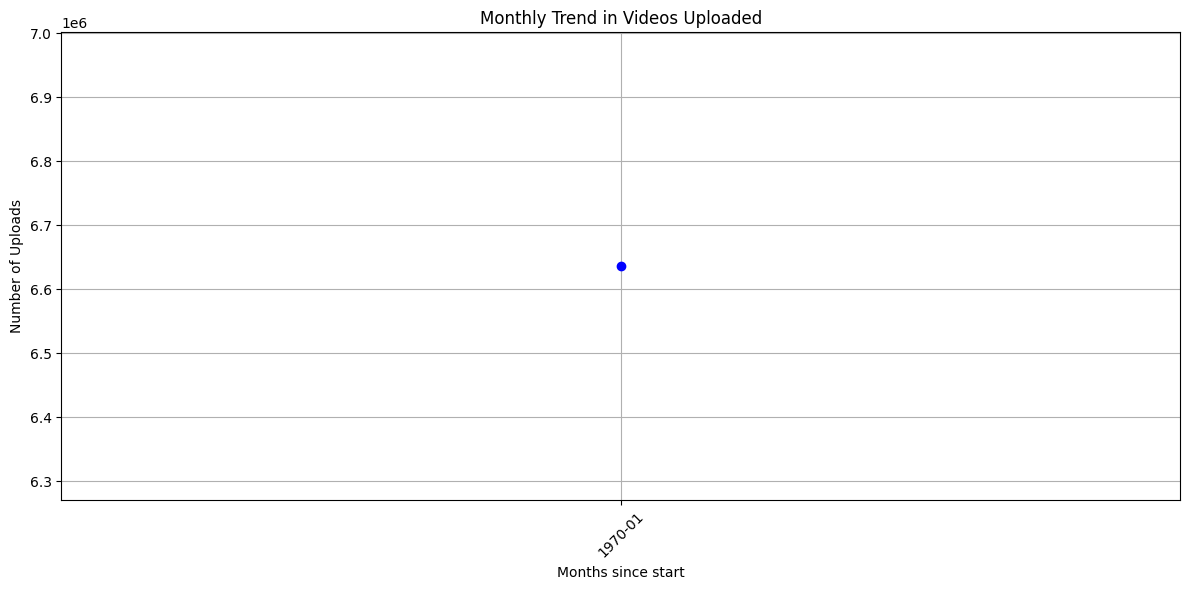

In [ ]:
# Group by created_year and created_month to aggregate uploads
monthly_uploads = df.groupby(['created_year', 'created_month'])['uploads'].sum().reset_index()

# Plotting the trend of uploads over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_uploads.index, monthly_uploads['uploads'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trend in Videos Uploaded')
plt.xlabel('Months since start')
plt.ylabel('Number of Uploads')
plt.xticks(ticks=monthly_uploads.index, labels=monthly_uploads.apply(lambda x: f"{x['created_year']}-{x['created_month']:02d}", axis=1), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 20. Average Number of Subscribers Gained Per Month Since Creation

In [ ]:
df['months_since_creation'] = ((pd.to_datetime('today') - df['created_date']).dt.days / 30).astype(int)
df['avg_subscribers_per_month'] = df['subscribers'] / df['months_since_creation']
print(df[['Youtuber', 'avg_subscribers_per_month']])


                     Youtuber  avg_subscribers_per_month
1              youtube movies               1.022167e-03
5                       music               6.915992e-04
7                   pewdiepie               6.397455e-04
8                 like nastya               6.073369e-04
12                     gaming               5.269636e-04
..                        ...                        ...
989                 migos atl               6.481717e-07
991  free fire india official               0.000000e+00
992                     panda               0.000000e+00
993               robtopgames               0.000000e+00
994              make joke of               0.000000e+00

[896 rows x 2 columns]
